---

Data Collection

---

In [1]:
import requests
import base64

# Your client ID and client secret obtained from the Spotify Developer Dashboard
client_id = 'with open("data.txt", "r") as f:
    client_secret = f.read()

# Spotify Accounts service endpoint for getting access tokens
token_url = 'https://accounts.spotify.com/api/token'

# Parameters for the token request
data = {
    'grant_type': 'client_credentials'
}

# Base64 encode the client ID and client secret
client_credentials = f"{client_id}:{client_secret}"
base64_credentials = base64.b64encode(client_credentials.encode()).decode('utf-8')

# HTTP Basic Auth header with base64-encoded client ID and client secret
headers = {
    'Authorization': f'Basic {base64_credentials}'
}

# Sending a POST request to the token endpoint
response = requests.post(token_url, data=data, headers=headers)

# Checking if the request was successful
if response.status_code == 200:
    # Parsing the JSON response
    token_data = response.json()
    # Extracting the access token
    access_token = token_data['access_token']
    print("Access Token:", access_token)
else:
    print(f"Error: {response.status_code}")

Access Token: BQCUu3-H9T_i_cga3wa6nxmJQOlvJ4XfvTOqXy6ZKPhYmFalC2Xpy6VUo0IupKKyaiWvDXFdFRdNnfUW9QAxyvwLRf889yJHhRk9K0epu6jl8lGCLK0


In [2]:
api_url = "https://api.spotify.com/v1/search/"
header = {
    'Authorization': 'Bearer ' + access_token
    }
param = {
    'q': 'artist:David Bowie',
    'type': 'track'
}


resp = requests.get(api_url, params=param, headers=header)

print('GET Response Status Code:', resp.status_code)
print(resp.text)

GET Response Status Code: 200
{
  "tracks" : {
    "href" : "https://api.spotify.com/v1/search?query=artist%3ADavid+Bowie&type=track&offset=0&limit=20",
    "items" : [ {
      "album" : {
        "album_type" : "album",
        "artists" : [ {
          "external_urls" : {
            "spotify" : "https://open.spotify.com/artist/0oSGxfWSnnOXhD2fKuz2Gy"
          },
          "href" : "https://api.spotify.com/v1/artists/0oSGxfWSnnOXhD2fKuz2Gy",
          "id" : "0oSGxfWSnnOXhD2fKuz2Gy",
          "name" : "David Bowie",
          "type" : "artist",
          "uri" : "spotify:artist:0oSGxfWSnnOXhD2fKuz2Gy"
        } ],
        "available_markets" : [ "AR", "AU", "AT", "BE", "BO", "BR", "BG", "CA", "CL", "CO", "CR", "CY", "CZ", "DK", "DO", "DE", "EC", "EE", "SV", "FI", "FR", "GR", "GT", "HN", "HK", "HU", "IS", "IE", "IT", "LV", "LT", "LU", "MY", "MT", "MX", "NL", "NZ", "NI", "NO", "PA", "PY", "PE", "PH", "PL", "PT", "SG", "SK", "ES", "SE", "CH", "TW", "TR", "UY", "US", "GB", "AD", "LI", 

In [3]:
if (resp.status_code == 200):
    data = resp.json()

    for track in data['tracks']['items']:
        print(track['name'])   

Starman - 2012 Remaster
Heroes - 2017 Remaster
Space Oddity - 2015 Remaster
Changes - 2015 Remaster
Let's Dance - 2018 Remaster
Rebel Rebel - 2016 Remaster
Moonage Daydream - 2012 Remaster
Modern Love - 2018 Remaster
Life on Mars? - 2015 Remaster
Golden Years - 2016 Remaster
Ziggy Stardust - 2012 Remaster
Young Americans - 2016 Remaster
Fame - 2016 Remaster
The Man Who Sold the World - 2015 Remaster
Suffragette City - 2012 Remaster
Let's Dance - 2002 Remaster
Sound and Vision - 2017 Remaster
Ashes to Ashes - 2017 Remaster
Magic Dance
As The World Falls Down


In [28]:
api_url = "https://api.spotify.com/v1/browse/categories"

param = {
    'country': 'US',
    'type': 'regional'
}


resp = requests.get(api_url, params=param, headers=header)

print('GET Response Status Code:', resp.status_code , '\n')
print(resp.text)

GET Response Status Code: 200 

{"categories":{"href":"https://api.spotify.com/v1/browse/categories?offset=0&limit=20","items":[{"href":"https://api.spotify.com/v1/browse/categories/0JQ5DAqbMKFz6FAsUtgAab","id":"0JQ5DAqbMKFz6FAsUtgAab","icons":[{"height":274,"url":"https://t.scdn.co/images/728ed47fc1674feb95f7ac20236eb6d7.jpeg","width":274}],"name":"New Releases"},{"href":"https://api.spotify.com/v1/browse/categories/0JQ5DAqbMKFPm1Mb6n2zCR","id":"0JQ5DAqbMKFPm1Mb6n2zCR","icons":[{"height":274,"url":"https://t.scdn.co/images/728ed47fc1674feb95f7ac20236eb6d7.jpeg","width":274}],"name":"Spotify CLASSICS"},{"href":"https://api.spotify.com/v1/browse/categories/0JQ5DAqbMKFQ00XGBls6ym","id":"0JQ5DAqbMKFQ00XGBls6ym","icons":[{"height":274,"url":"https://t.scdn.co/images/728ed47fc1674feb95f7ac20236eb6d7.jpeg","width":274}],"name":"Hip-Hop"},{"href":"https://api.spotify.com/v1/browse/categories/0JQ5DAqbMKFEC4WFtoNRpw","id":"0JQ5DAqbMKFEC4WFtoNRpw","icons":[{"height":274,"url":"https://t.scdn.co/

In [5]:
if (resp.status_code == 200):
    data = resp.json()

    for item in data['categories']['items']:
        print(item['name'])

New Releases
Spotify CLASSICS
Hip-Hop
Pop
Country
Charts
Latin
Student
Rock
Dance/Electronic
Discover
In the car
Mood
Indie
Disney
R&B
Christian & Gospel
Workout
Música Mexicana
La Tierra del Corrido


---

Project Start

---

Question/Problem addressed:

How does Spotify's and Apple Music's top 100 tracks compare?

In [6]:
playlist_id = '5ABHKGoOzxkaa28ttQV9sE'

api_url = "https://api.spotify.com/v1/search"

param = {
    'q': 'Top 100 most streamed songs on Spotify',
    'type': 'playlist',
    'limit': 10
}


resp = requests.get(api_url, params=param, headers=header)

print('GET Response Status Code:', resp.status_code , '\n')
print(resp.text)

GET Response Status Code: 200 

{
  "playlists" : {
    "href" : "https://api.spotify.com/v1/search?query=Top+100+most+streamed+songs+on+Spotify&type=playlist&offset=0&limit=10",
    "items" : [ {
      "collaborative" : false,
      "description" : "The 100 most streamed songs on Spotify ever, in correct order (last updated January 25:th 2024)",
      "external_urls" : {
        "spotify" : "https://open.spotify.com/playlist/5ABHKGoOzxkaa28ttQV9sE"
      },
      "href" : "https://api.spotify.com/v1/playlists/5ABHKGoOzxkaa28ttQV9sE",
      "id" : "5ABHKGoOzxkaa28ttQV9sE",
      "images" : [ {
        "height" : null,
        "url" : "https://image-cdn-ak.spotifycdn.com/image/ab67706c0000bebb98136a34271cdc2cd072725d",
        "width" : null
      } ],
      "name" : "Top 100 most streamed songs on Spotify *Updated*",
      "owner" : {
        "display_name" : "hoolgerssson",
        "external_urls" : {
          "spotify" : "https://open.spotify.com/user/jonathan.holgersson"
        },

In [7]:
#API string found from previous response

api_url = "https://api.spotify.com/v1/playlists/5ABHKGoOzxkaa28ttQV9sE/tracks"


resp = requests.get(api_url, headers=header)

print('GET Response Status Code:', resp.status_code , '\n')
print(resp.text)

GET Response Status Code: 200 

{
  "href" : "https://api.spotify.com/v1/playlists/5ABHKGoOzxkaa28ttQV9sE/tracks?offset=0&limit=100",
  "items" : [ {
    "added_at" : "2024-02-15T21:57:53Z",
    "added_by" : {
      "external_urls" : {
        "spotify" : "https://open.spotify.com/user/jonathan.holgersson"
      },
      "href" : "https://api.spotify.com/v1/users/jonathan.holgersson",
      "id" : "jonathan.holgersson",
      "type" : "user",
      "uri" : "spotify:user:jonathan.holgersson"
    },
    "is_local" : false,
    "primary_color" : null,
    "track" : {
      "album" : {
        "album_type" : "album",
        "artists" : [ {
          "external_urls" : {
            "spotify" : "https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ"
          },
          "href" : "https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ",
          "id" : "1Xyo4u8uXC1ZmMpatF05PJ",
          "name" : "The Weeknd",
          "type" : "artist",
          "uri" : "spotify:artist:1Xyo4u8uXC1Z

In [8]:
spotifyTop100 = []

if (resp.status_code == 200):
    data = resp.json()

    for item in data['items']:
        track = item['track']
        spotifyTop100.append(track['name'])

print(spotifyTop100)

['Blinding Lights', 'Shape of You', 'Someone You Loved', 'Sunflower - Spider-Man: Into the Spider-Verse', 'Starboy', 'As It Was', 'One Dance', 'Dance Monkey', 'STAY (with Justin Bieber)', 'rockstar', 'Believer', 'Heat Waves', 'Perfect', 'Closer', 'Bed of Roses', 'Sweater Weather', 'lovely (with Khalid)', 'Testimony', "Say You Won't Let Go", 'Señorita', 'Watermelon Sugar', "Don't Start Now", 'The Underdog', 'Lucid Dreams', 'bad guy', "God's Plan", 'Something Just Like This', "if u think i'm pretty", 'Photograph', 'Thinking out Loud', 'Bam Bam (Ma Jolie)', 'Take Me To Church', 'Bohemian Rhapsody - Remastered 2011', 'Circles', 'SUMMERTIME VIBE', 'Riptide', 'Shallow', 'Love Yourself', 'Counting Stars', "I Just Can't Love You", 'All of Me', 'Thunder', 'goosebumps', "Can't Hold Us (feat. Ray Dalton)", 'Love You True - SMG', 'Another Love', 'Stressed Out', 'Wake Me Up - Radio Edit', 'The Hills', 'Rescue Me', '7 rings', 'SAD!', 'Let Her Go', 'Yellow', 'feel it', 'Demons', 'Jocelyn Flores', 'HU

In [9]:
# Read CSV to gather Apple Music Data

import pandas as pd
import numpy as np

musicData2023 = pd.read_csv('spotify-2023.csv', encoding='latin1')

musicData2023.head()

musicData2023 = musicData2023.dropna()

In [10]:
appleMusic = musicData2023.loc[musicData2023['in_apple_charts'] < 101]
appleMusic = appleMusic.loc[appleMusic['in_apple_charts'] > 0]
appleMusic = appleMusic[['track_name', 'in_apple_charts']]
appleMusic = appleMusic.drop_duplicates(subset=['in_apple_charts'])

appleMusicTop100 = []
for item in appleMusic['track_name']:
    appleMusicTop100.append(item)

print(appleMusicTop100)

['Columbia', 'Classy 101', 'See You Again', 'Angels Like You', 'Die For You', 'Die For You - Remix', 'El Cielo', 'AMARGURA', 'Moonlight', 'Tï¿½ï¿', "Boy's a liar Pt. 2", 'Yellow', 'Karma', 'Overdrive', "Enchanted (Taylor's Version)", 'BABY HELLO', 'Quevedo: Bzrp Music Sessions, Vol. 52', 'Here With Me', 'Yandel 150', 'CORAZï¿½ï¿½N VA', 'Until I Found You (with Em Beihold) - Em Beihold Version', 'Novidade na ï¿½ï¿', "Back To December (Taylor's Version)", 'STAY (with Justin Bieber)', 'El Merengue', 'MONTAGEM - FR PUNK', 'Fast Car', 'What It Is (Solo Version)', 'Donï¿½ï¿½ï¿½t Bl', 'Chemical', 'Mockingbird', 'Primera Cita', 'Rara Vez', 'august', 'Nonsense', 'Feliz Cumpleaï¿½ï¿½os Fe', "Can't Hold Us (feat. Ray Dalton)", 'Rauw Alejandro: Bzrp Music Sessions, Vol. 56', 'Trance (with Travis Scott & Young Thug)', 'Tere Vaaste (From "Zara Hatke Zara Bachke")', 'Novo Balanï¿½', 'Stargirl Interlude', 'Un Finde | CROSSOVER #2', 'The Night We Met', 'Am I Dreaming (Metro Boomin & A$AP Rocky, Roisee)

In [11]:
numStreamData = musicData2023[['streams']]

totalStreams = 0

for item in numStreamData.streams:
    totalStreams += item

formatted_number = '{:,}'.format(totalStreams)
print(formatted_number + ": Total streams of songs on Spotify charts")

382,692,383,757: Total streams of songs on Spotify charts


In [12]:
yearVsStreams = musicData2023[['released_year', 'streams']]

yearVsStreams.head()

,released_year,streams
0,2023,141381703
1,2023,133716286
2,2023,140003974
3,2019,800840817
4,2023,303236322


---

Analysis

---

In [13]:
import matplotlib.pyplot as plt

In [14]:
commonTopSongs = []

for item in spotifyTop100:
    if item in appleMusicTop100:
        commonTopSongs.append(item)

print(commonTopSongs, '\n', len(commonTopSongs))

['STAY (with Justin Bieber)', "Say You Won't Let Go", "Can't Hold Us (feat. Ray Dalton)", 'Yellow', 'Die For You', 'Do I Wanna Know?', 'Memories'] 
 7


In [15]:
yearVsStreams = yearVsStreams.groupby('released_year')['streams'].sum()

In [16]:
print(yearVsStreams)

released_year
1930        90598517
1942       395591396
1946       389771964
1950       473248298
1957       178660459
1958       541349417
1959       573417844
1963      1311263381
1970       520034544
1971       460492795
1973       838586769
1975      2009094673
1979       403939487
1982       350275450
1983      1593270737
1984      1830751842
1985      2230809941
1986      1133675836
1987      1553497987
1991      2058839789
1992      1271293243
1995       579395142
1996       106933107
1997       103762518
1998      1284942608
1999      5403077822
2000      3672857101
2002      8679722823
2003      3168042741
2004      2857994626
2005       180577478
2008      2480815900
2010      6290404915
2011      7906073611
2012      6178445848
2013     13622252972
2014     15301521872
2015      8193809307
2016     19303095613
2017     28450076259
2018     12143280576
2019     23190924360
2020     18032286422
2021     52149584399
2022    100318791453
2023     22885249915
Name: streams, dtype

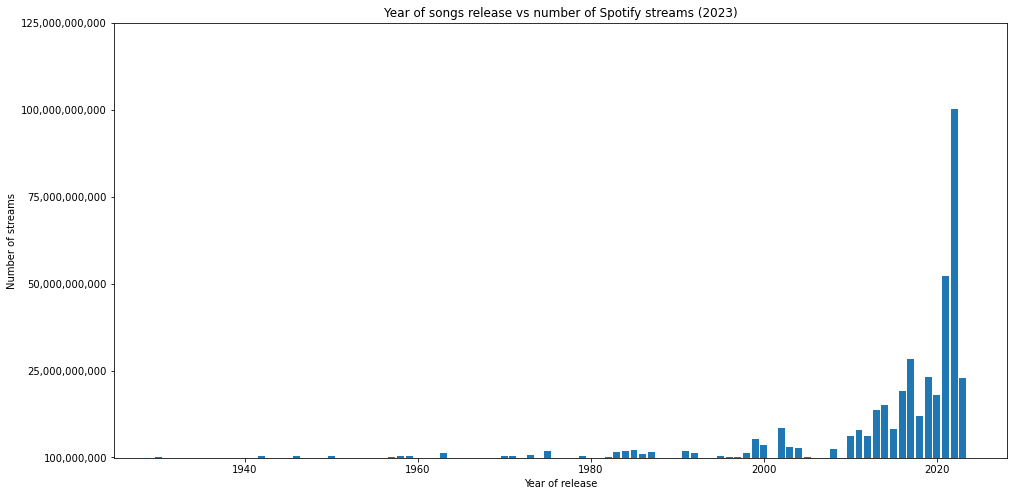

In [17]:
years = list(yearVsStreams.keys())
streams= []
for thing in yearVsStreams:
    streams.append(thing)

plt.figure(figsize=[16,8])
plt.bar(years, streams)
plt.xlabel('Year of release')
plt.ylabel('Number of streams')
plt.title("Year of songs release vs number of Spotify streams (2023)")
plt.yticks([100000000, 25000000000, 50000000000, 75000000000, 100000000000, 125000000000], ['100,000,000', '25,000,000,000', '50,000,000,000', '75,000,000,000', '100,000,000,000', '125,000,000,000'])

plt.show()

In [18]:
streamBattleData = musicData2023[['track_name', 'in_spotify_charts', 'in_apple_charts']]
streamBattleData = streamBattleData.drop_duplicates(subset=['track_name'])

trackNames = streamBattleData['track_name'].unique()

print(streamBattleData)

                              track_name  in_spotify_charts  in_apple_charts
0    Seven (feat. Latto) (Explicit Ver.)                147              263
1                                   LALA                 48              126
2                                vampire                113              207
3                           Cruel Summer                100              207
4                         WHERE SHE GOES                 50              133
..                                   ...                ...              ...
947                         My Mind & Me                  0               13
948            Bigger Than The Whole Sky                  0                0
949                 A Veces (feat. Feid)                  0                0
950                        En La De Ella                  0               26
951                                Alone                  2               18

[810 rows x 3 columns]


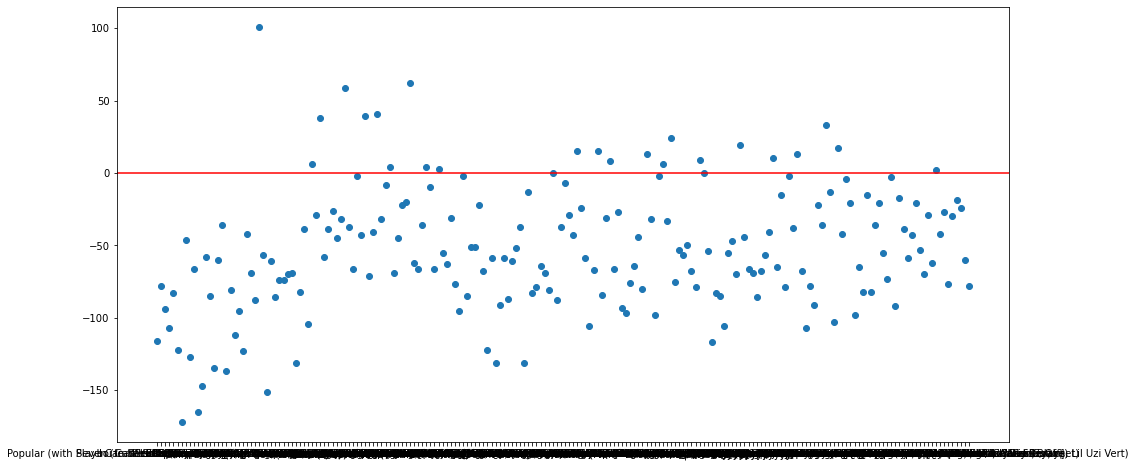

In [19]:
spotifyValues = []
for i in streamBattleData['in_spotify_charts'].values:
    spotifyValues.append(i)

appleValues = []
for i in streamBattleData['in_apple_charts'].values:
    appleValues.append(i)

arrayDifference = np.array(spotifyValues) - np.array(appleValues)

plt.figure(figsize=[16,8])

plt.scatter(trackNames[:200], arrayDifference[:200])
plt.axhline(y=0, color='r')

plt.show()

In [20]:
spotifyGreaterStreams = 0
equalStreams = 0

for item in arrayDifference:
    if item > 1:
        spotifyGreaterStreams += 1

for item in arrayDifference:
    if item == 0:
        equalStreams += 1



print(spotifyGreaterStreams , "of the most streamed songs on Spotify in 2023 have higher stream numbers than Apple Music")
print(len(arrayDifference) - spotifyGreaterStreams - equalStreams, "of the most streamed songs on Spotify in 2023 have lower stream numbers than Apple Music")
print(equalStreams, "songs that have equal streams on both platforms")


60 of the most streamed songs on Spotify in 2023 have higher stream numbers than Apple Music
674 of the most streamed songs on Spotify in 2023 have lower stream numbers than Apple Music
76 songs that have equal streams on both platforms


In [21]:
danceData = musicData2023[['danceability_%', 'bpm']]

danceData.head()

,danceability_%,bpm
0,80,125
1,71,92
2,51,138
3,55,170
4,65,144


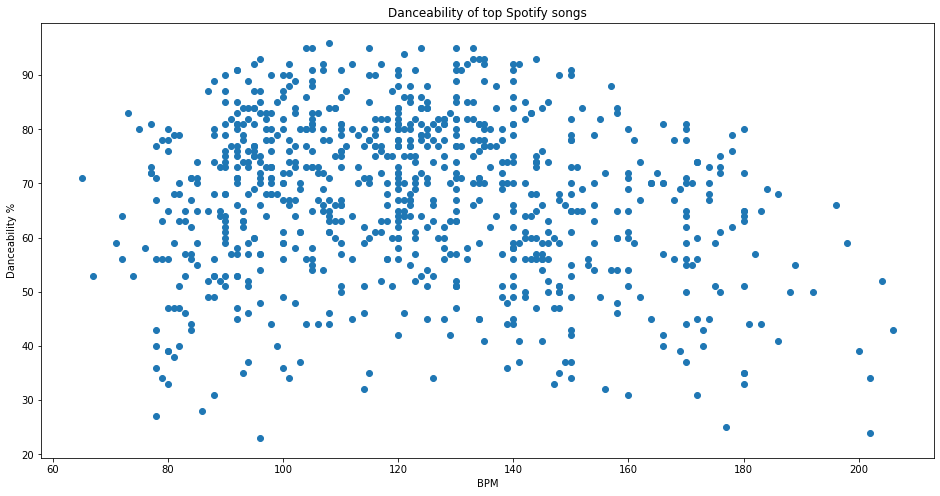

In [22]:
plt.figure(figsize=[16,8])

plt.scatter(danceData['bpm'], danceData['danceability_%'])

plt.xlabel('BPM')
plt.ylabel('Danceability %')
plt.title("Danceability of top Spotify songs")

plt.show()

In [23]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 9):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    km.fit(danceData)
    wcss.append(km.inertia_)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


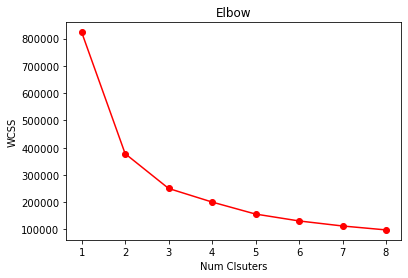

In [24]:
plt.plot(range(1,9), wcss, '-ro')
plt.title('Elbow')
plt.xlabel('Num Clsuters')
plt.ylabel('WCSS')
plt.show()

In [25]:
k = 3
km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
y_km = km.fit_predict(danceData)

In [26]:
danceData = danceData.rename(columns={'danceability_%': 'dance'})

print(danceData.columns)

Index(['dance', 'bpm'], dtype='object')


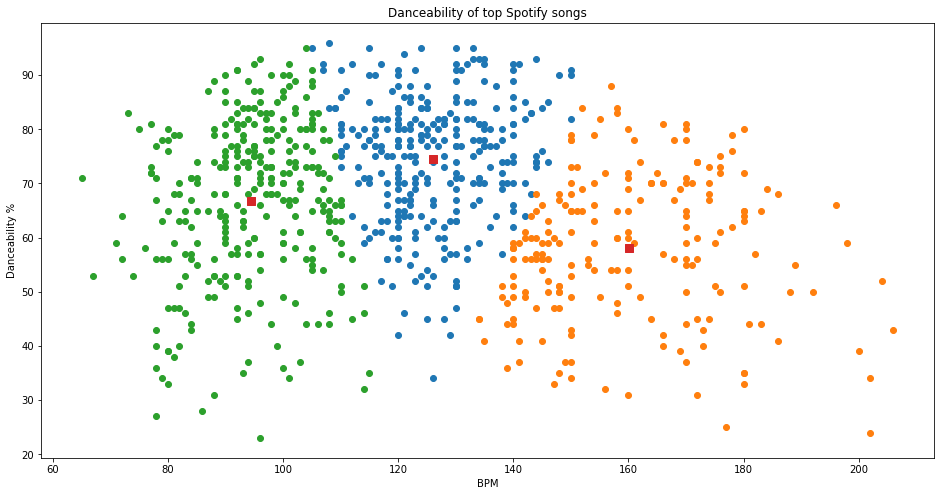

In [27]:
plt.figure(figsize=[16,8])
for i in range(0, k):
    plt.scatter(danceData[y_km == i].bpm, danceData[y_km == i].dance)
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 0], marker=',',s=50)

plt.xlabel('BPM')
plt.ylabel('Danceability %')
plt.title("Danceability of top Spotify songs")


plt.show()